<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Required-Packages" data-toc-modified-id="Importing-Required-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Required Packages</a></span></li><li><span><a href="#Importing-The-Dataset" data-toc-modified-id="Importing-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing The Dataset</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Building-Prophet-Models" data-toc-modified-id="Building-Prophet-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building Prophet Models</a></span><ul class="toc-item"><li><span><a href="#Returns" data-toc-modified-id="Returns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Returns</a></span><ul class="toc-item"><li><span><a href="#Preparing-Data-for-Prophet" data-toc-modified-id="Preparing-Data-for-Prophet-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Preparing Data for Prophet</a></span></li><li><span><a href="#Fitting-Model" data-toc-modified-id="Fitting-Model-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Fitting Model</a></span></li><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Making Predictions</a></span></li><li><span><a href="#Plotting-Forecasts-and-components" data-toc-modified-id="Plotting-Forecasts-and-components-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Plotting Forecasts and components</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></li><li><span><a href="#Prices" data-toc-modified-id="Prices-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Prices</a></span><ul class="toc-item"><li><span><a href="#Preparing-Data-for-Prophet" data-toc-modified-id="Preparing-Data-for-Prophet-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Preparing Data for Prophet</a></span></li><li><span><a href="#Fitting-Model" data-toc-modified-id="Fitting-Model-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Fitting Model</a></span></li><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Making Predictions</a></span></li><li><span><a href="#Plotting-Forecasts-and-components" data-toc-modified-id="Plotting-Forecasts-and-components-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Plotting Forecasts and components</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></li></ul></li></ul></div>

# Importing Required Packages

In [39]:
!pip install fbprophet

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import mean_squared_error

from fbprophet import Prophet

sns.set()

# Importing The Dataset

In [41]:
file_path = "/content/data.csv"

In [42]:
data_backup = pd.read_csv(file_path)
data_backup.Date = pd.to_datetime(data_backup.Date)
data_backup.set_index("Date", inplace = True)

In [43]:
data = data_backup[["spx", "spx_ret"]]

# Train Test Split

In [44]:
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]

# Building Prophet Models

## Returns

### Preparing Data for Prophet

In [45]:
returns_df = pd.DataFrame(columns = ["ds", "y"])
returns_df["ds"] = data.index
returns_df["y"] = data["spx_ret"].values

In [46]:
returns_train_df = pd.DataFrame(columns = ["ds", "y"])
returns_train_df["ds"] = train_df.index
returns_train_df["y"] = train_df["spx_ret"].values

In [47]:
returns_test_df = pd.DataFrame(columns = ["ds", "y"])
returns_test_df["ds"] = test_df.index
returns_test_df["y"] = test_df["spx_ret"].values

### Fitting Model

In [48]:
returns_model = Prophet()
returns_model.fit(returns_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Making Predictions

In [49]:
future_df = returns_model.make_future_dataframe(periods=len(returns_test_df.index), freq = "B")

In [50]:
returns_predictions_df = returns_model.predict(future_df)

In [51]:
returns_predictions_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1994-01-06,0.165755,-1.372400,1.557519,0.165755,0.165755,-0.071396,-0.071396,-0.071396,-0.094715,-0.094715,-0.094715,0.023319,0.023319,0.023319,0.0,0.0,0.0,0.094359
1,1994-01-07,0.165732,-1.338978,1.586710,0.165732,0.165732,-0.089593,-0.089593,-0.089593,-0.102429,-0.102429,-0.102429,0.012837,0.012837,0.012837,0.0,0.0,0.0,0.076139
2,1994-01-10,0.165664,-1.385651,1.482549,0.165664,0.165664,-0.124425,-0.124425,-0.124425,-0.102641,-0.102641,-0.102641,-0.021784,-0.021784,-0.021784,0.0,0.0,0.0,0.041239
3,1994-01-11,0.165641,-1.432492,1.451860,0.165641,0.165641,-0.082938,-0.082938,-0.082938,-0.049501,-0.049501,-0.049501,-0.033437,-0.033437,-0.033437,0.0,0.0,0.0,0.082703
4,1994-01-12,0.165619,-1.398236,1.409501,0.165619,0.165619,-0.124739,-0.124739,-0.124739,-0.080083,-0.080083,-0.080083,-0.044656,-0.044656,-0.044656,0.0,0.0,0.0,0.040879


### Plotting Forecasts and components

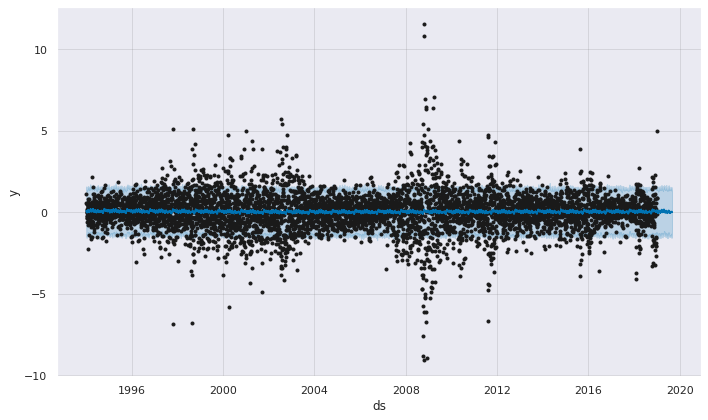

In [52]:
returns_model.plot(returns_predictions_df)
plt.show()

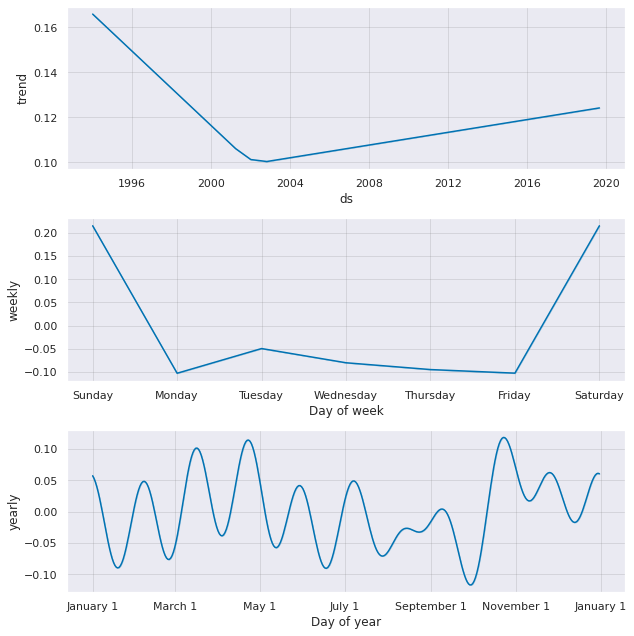

In [53]:
returns_model.plot_components(returns_predictions_df)
plt.show()

**Actual Weekly Seasonality**

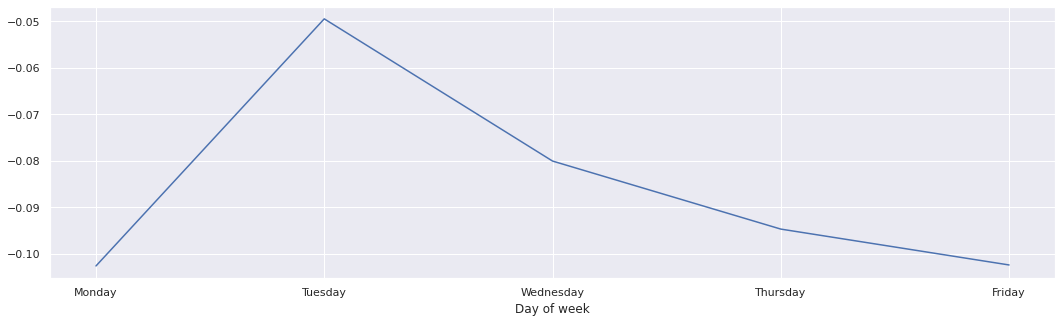

In [54]:
start_weekday = 0
while(True):
  if returns_predictions_df.ds[start_weekday].weekday() == 0:
    break
  else:
    start_weekday = start_weekday + 1

end_weekday = start_weekday + 5

days = returns_predictions_df.ds[start_weekday:end_weekday]
weekly_seas = returns_predictions_df.weekly[start_weekday:end_weekday]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(5), weekly_seas)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(days.dt.day_name())
ax.set_xlabel('Day of week')

plt.show()

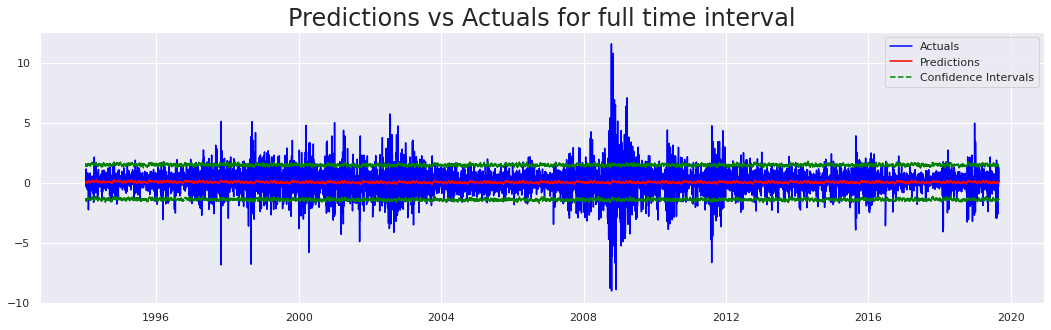

In [55]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(data["spx_ret"], color = "blue", label = "Actuals")
plt.plot(data.index, returns_predictions_df["yhat"], color = "red", label = "Predictions")
plt.plot(data.index, returns_predictions_df["yhat_lower"], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(data.index, returns_predictions_df["yhat_upper"], color = "green", linestyle = "--")

plt.title("Predictions vs Actuals for full time interval", size = 24)

plt.legend()
plt.show()

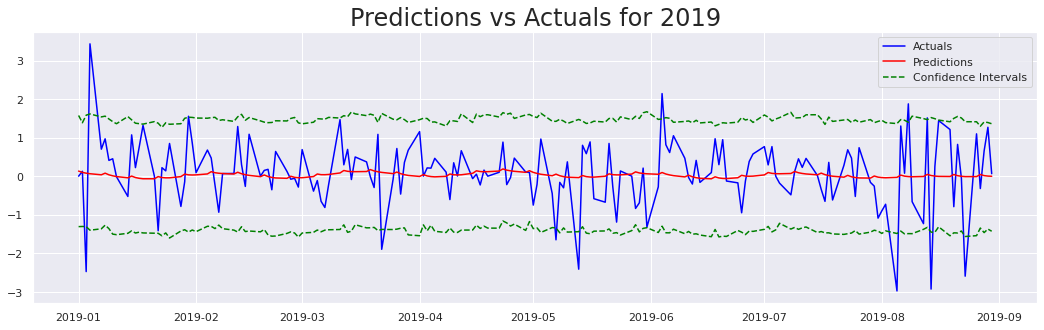

In [56]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df["spx_ret"], color = "blue", label = "Actuals")
plt.plot(test_df.index, returns_predictions_df.loc[returns_train_df.index[-1]+1:]["yhat"], color = "red", label = "Predictions")
plt.plot(test_df.index, returns_predictions_df.loc[returns_train_df.index[-1]+1:]["yhat_lower"], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(test_df.index, returns_predictions_df.loc[returns_train_df.index[-1]+1:]["yhat_upper"], color = "green", linestyle = "--")

plt.title("Predictions vs Actuals for 2019", size = 24)

plt.legend()
plt.show()

### Accuracy

In [57]:
y_true = returns_test_df["y"].values

y_pred = returns_predictions_df["yhat"][-len(returns_test_df.index):].values

np.sqrt(mean_squared_error(y_true, y_pred))

0.8555543688702273

## Prices

### Preparing Data for Prophet

In [58]:
prices_df = pd.DataFrame(columns = ["ds", "y"])
prices_df["ds"] = data.index
prices_df["y"] = data["spx"].values

In [59]:
prices_train_df = pd.DataFrame(columns = ["ds", "y"])
prices_train_df["ds"] = train_df.index
prices_train_df["y"] = train_df["spx"].values

In [60]:
prices_test_df = pd.DataFrame(columns = ["ds", "y"])
prices_test_df["ds"] = test_df.index
prices_test_df["y"] = test_df["spx"].values

### Fitting Model

In [61]:
prices_model = Prophet()
prices_model.fit(prices_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Making Predictions

In [62]:
future_df = prices_model.make_future_dataframe(periods=len(prices_test_df.index), freq = "B")

In [63]:
prices_predictions_df = prices_model.predict(future_df)

In [64]:
prices_predictions_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1994-01-06,442.372553,359.854411,531.707904,442.372553,442.372553,3.709399,3.709399,3.709399,-3.919190,-3.919190,-3.919190,7.628589,7.628589,7.628589,0.0,0.0,0.0,446.081952
1,1994-01-07,442.466441,360.475555,531.720934,442.466441,442.466441,4.260166,4.260166,4.260166,-4.111033,-4.111033,-4.111033,8.371199,8.371199,8.371199,0.0,0.0,0.0,446.726607
2,1994-01-10,442.748103,363.893243,536.134791,442.748103,442.748103,5.076176,5.076176,5.076176,-4.815629,-4.815629,-4.815629,9.891805,9.891805,9.891805,0.0,0.0,0.0,447.824279
3,1994-01-11,442.841991,362.402344,540.172604,442.841991,442.841991,5.902695,5.902695,5.902695,-4.227945,-4.227945,-4.227945,10.130640,10.130640,10.130640,0.0,0.0,0.0,448.744686
4,1994-01-12,442.935878,364.688263,536.790389,442.935878,442.935878,6.243449,6.243449,6.243449,-3.983220,-3.983220,-3.983220,10.226669,10.226669,10.226669,0.0,0.0,0.0,449.179327


### Plotting Forecasts and components

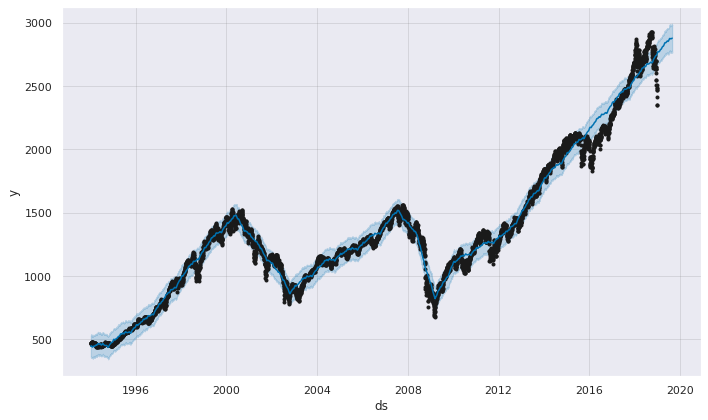

In [65]:
prices_model.plot(prices_predictions_df)
plt.show()

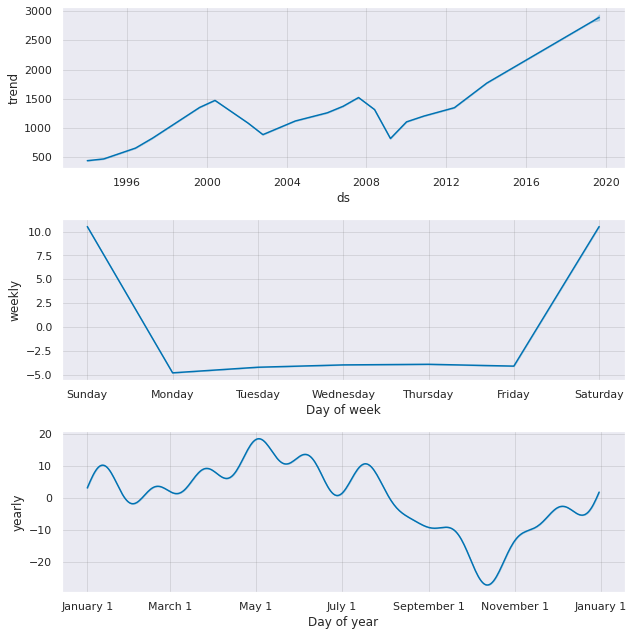

In [66]:
prices_model.plot_components(prices_predictions_df)
plt.show()

**Actual Weekly Seasonality**

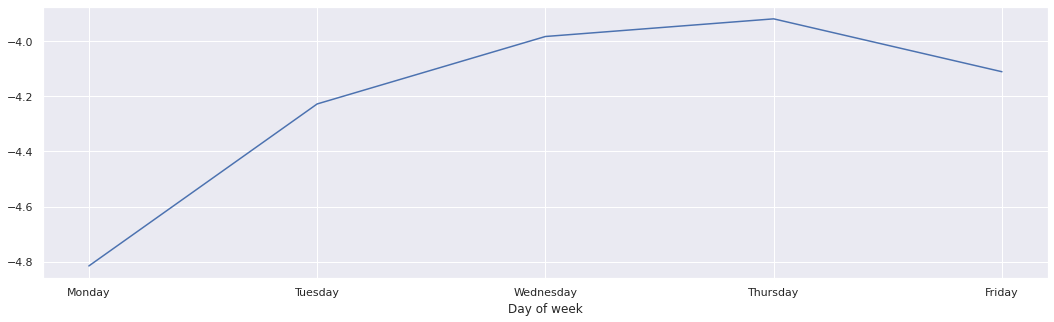

In [67]:
start_weekday = 0
while(True):
  if prices_predictions_df.ds[start_weekday].weekday() == 0:
    break
  else:
    start_weekday = start_weekday + 1

end_weekday = start_weekday + 5

days = prices_predictions_df.ds[start_weekday:end_weekday]
weekly_seas = prices_predictions_df.weekly[start_weekday:end_weekday]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(5), weekly_seas)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(days.dt.day_name())
ax.set_xlabel('Day of week')

plt.show()

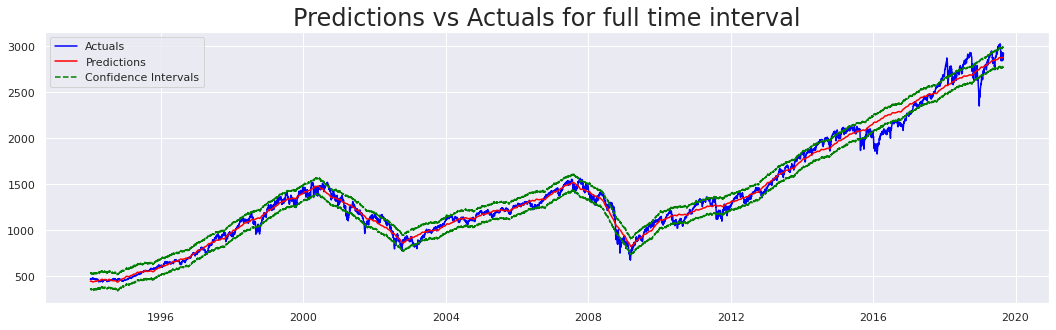

In [68]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(data["spx"], color = "blue", label = "Actuals")
plt.plot(data.index, prices_predictions_df["yhat"], color = "red", label = "Predictions")
plt.plot(data.index, prices_predictions_df["yhat_lower"], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(data.index, prices_predictions_df["yhat_upper"], color = "green", linestyle = "--")

plt.title("Predictions vs Actuals for full time interval", size = 24)

plt.legend()
plt.show()

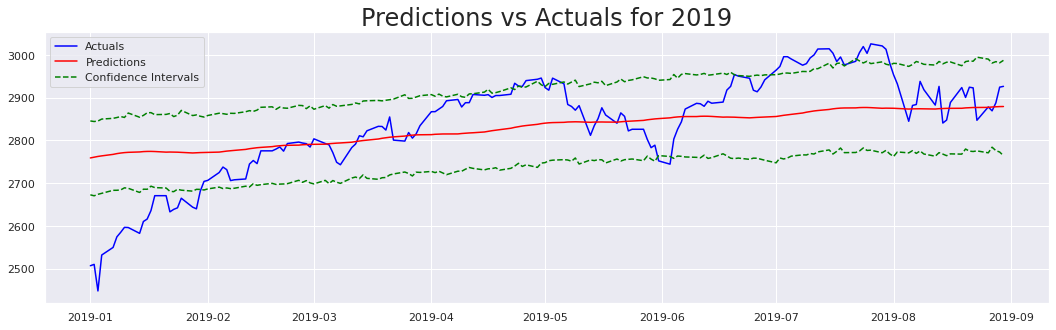

In [69]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df["spx"], color = "blue", label = "Actuals")
plt.plot(test_df.index, prices_predictions_df.loc[prices_train_df.index[-1]+1:]["yhat"], color = "red", label = "Predictions")
plt.plot(test_df.index, prices_predictions_df.loc[prices_train_df.index[-1]+1:]["yhat_lower"], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(test_df.index, prices_predictions_df.loc[prices_train_df.index[-1]+1:]["yhat_upper"], color = "green", linestyle = "--")

plt.title("Predictions vs Actuals for 2019", size = 24)

plt.legend()
plt.show()

### Accuracy

In [70]:
y_true = prices_test_df["y"].values

y_pred = prices_predictions_df["yhat"][-len(prices_test_df.index):].values

np.sqrt(mean_squared_error(y_true, y_pred))

90.76856874743561